In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [2]:
orig_df = pd.read_csv('csv-export.csv')
df = orig_df
df.columns = ["method","path","remote","bytes_sent","request_length","request_time","status","tag","upstream","user_agent","datetime","upstream_addr"]
df["datetime"] = pd.to_datetime(df["datetime"])
df = df[df.path.isna() == False]

In [12]:
df.status = df.status.astype(int)
df.sample(5)

,method,path,remote,bytes_sent,request_length,request_time,status,tag,upstream,user_agent,datetime,upstream_addr
2369929,GET,/gateway/news,195.9.193.194,2.0,37.0,0.021,200,mcs,default-gateway-service-80,HSE/4.18 (com.matkavt.HSE; build:0; iOS 14.4.2...,2021-04-09 20:29:27+00:00,10.100.152.87:80
2455950,POST,/grades,45.89.226.135,64.0,621.0,0.038,400,mcs,default-reports-service-80,Apache-HttpClient/4.5.9 (Java/1.8.0_282),2021-04-10 01:40:50+00:00,10.100.231.121:80
2353647,POST,/grades,45.89.226.135,2.0,714.0,0.117,200,mcs,default-reports-service-80,Apache-HttpClient/4.5.9 (Java/1.8.0_282),2021-04-09 19:52:44+00:00,10.100.231.121:80
652316,GET,/gateway/news,176.213.4.222,2.0,667.0,0.021,200,mcs,default-gateway-service-80,HSE/4.18 (com.matkavt.HSE; build:0; iOS 14.4.2...,2021-04-07 17:49:32+00:00,10.100.231.81:80
2310094,GET,/dump/214790,89.208.222.170,376.0,1520.0,0.075,200,mcs,default-dump-service-80,HSE/4.18 (com.matkavt.HSE; build:0; iOS 14.4.2...,2021-04-09 23:01:53+00:00,10.100.231.92:80


In [3]:
def starts_with_filter(x):
    starts_with = ["/dump", "/v2/dump", "/gateway/dump", "/v2/deadlines", "/v3/ruz", "/ratings", "/gateway/ruz/", "/avatars/batch", "/auth/credentials", "/vk/amba", "/v2/pf/projects", "/v2/events", "/ruz/", "/logs", "/gateway/deadlines", "/deadlines", "/april", "/fcm"]
    for s in starts_with:
        if x.startswith(s):
            x = s
    return x


df.path = df.path.apply(starts_with_filter)

In [4]:
df.loc[~df.path.isin(df.path.value_counts().head(30).keys()), "path"] = '/trash'
df['Day'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour
df['Time'] = (df['datetime'].dt.hour * 60 + df['datetime'].dt.minute) * 60 + df['datetime'].dt.second

In [44]:
df

,method,path,remote,bytes_sent,request_length,request_time,status,tag,upstream,user_agent,datetime,upstream_addr,Day,Hour,Time
0,GET,/,10.244.2.0,146.0,144.0,0.002,404,sber,upstream-default-backend,python-requests/2.22.0,2021-04-02 18:13:37+00:00,127.0.0.1:8181,2,18,65617
1,GET,/,10.244.2.0,146.0,144.0,0.001,404,sber,upstream-default-backend,python-requests/2.22.0,2021-04-02 18:14:28+00:00,127.0.0.1:8181,2,18,65668
2,GET,/,10.244.2.0,146.0,144.0,0.000,404,sber,upstream-default-backend,python-requests/2.22.0,2021-04-02 18:15:14+00:00,127.0.0.1:8181,2,18,65714
3,GET,/,10.244.2.0,146.0,144.0,0.000,404,sber,upstream-default-backend,python-requests/2.22.0,2021-04-02 18:15:39+00:00,127.0.0.1:8181,2,18,65739
4,GET,/,10.244.2.0,146.0,144.0,0.001,404,sber,upstream-default-backend,python-requests/2.22.0,2021-04-02 18:16:25+00:00,127.0.0.1:8181,2,18,65785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815350,POST,/grades,45.89.226.135,2.0,791.0,0.255,200,mcs,default-reports-service-80,Apache-HttpClient/4.5.9 (Java/1.8.0_282),2021-04-10 15:28:07+00:00,10.100.231.104:80,10,15,55687
2815351,POST,/notifications/devices,213.87.151.43,285.0,849.0,0.046,200,mcs,default-notifications-service-80,okhttp/3.12.0,2021-04-10 15:28:07+00:00,10.100.152.77:80,10,15,55687
2815352,GET,/dump,89.208.222.170,358.0,170.0,0.065,200,mcs,default-dump-service-80,-,2021-04-10 15:28:07+00:00,10.100.231.125:80,10,15,55687
2815353,GET,/stories/,213.87.151.43,2108.0,23.0,0.118,200,mcs,default-stories-service-80,okhttp/3.12.0,2021-04-10 15:28:07+00:00,10.100.231.113:80,10,15,55687


# Посмотрим, что у нас за данные и порисуем картиночки

In [15]:
grouped1 = df.groupby([pd.Grouper(key="datetime", freq='10min'), "method"]).count().reset_index().pivot(index="datetime", columns="method", values="path").fillna(0)
grouped1

method,DELETE,GET,HEAD,OPTIONS,POST,PUT
datetime,,,,,,
2021-04-02 18:10:00+00:00,0.0,54.0,0.0,0.0,0.0,0.0
2021-04-02 18:20:00+00:00,0.0,57.0,0.0,0.0,0.0,0.0
2021-04-02 18:30:00+00:00,0.0,55.0,0.0,0.0,0.0,0.0
2021-04-02 18:40:00+00:00,0.0,59.0,0.0,0.0,0.0,0.0
2021-04-02 18:50:00+00:00,0.0,59.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-04-10 14:40:00+00:00,0.0,338.0,1.0,0.0,256.0,3.0
2021-04-10 15:00:00+00:00,0.0,1583.0,4.0,36.0,1420.0,15.0
2021-04-10 15:10:00+00:00,9.0,2654.0,8.0,10.0,2431.0,18.0


In [16]:
grouped2 = df.groupby([pd.Grouper(key="datetime", freq='10min'), "status"]).count().reset_index().pivot(index="datetime", columns="status", values="path").fillna(0)
grouped2

status,200,202,204,301,302,304,400,401,403,404,418,431,500,502
datetime,,,,,,,,,,,,,,
2021-04-02 18:10:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0
2021-04-02 18:20:00+00:00,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0
2021-04-02 18:30:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0
2021-04-02 18:40:00+00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,0.0,0.0
2021-04-02 18:50:00+00:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10 14:40:00+00:00,563.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,13.0,0.0,0.0,2.0,0.0
2021-04-10 15:00:00+00:00,2801.0,0.0,57.0,0.0,0.0,2.0,15.0,83.0,0.0,70.0,0.0,0.0,30.0,0.0
2021-04-10 15:10:00+00:00,4672.0,0.0,45.0,0.0,0.0,7.0,44.0,199.0,0.0,119.0,0.0,0.0,44.0,0.0


In [7]:
curr = df[['datetime', 'bytes_sent']].groupby('datetime').count().reset_index()
curr.index=curr['datetime']

In [6]:
curr

,datetime,path
datetime,,
2021-04-02 18:10:00+00:00,2021-04-02 18:10:00+00:00,1
2021-04-02 18:10:05+00:00,2021-04-02 18:10:05+00:00,1
2021-04-02 18:10:10+00:00,2021-04-02 18:10:10+00:00,1
2021-04-02 18:10:13+00:00,2021-04-02 18:10:13+00:00,1
2021-04-02 18:10:15+00:00,2021-04-02 18:10:15+00:00,1
...,...,...
2021-04-10 19:07:45+00:00,2021-04-10 19:07:45+00:00,1
2021-04-10 19:07:46+00:00,2021-04-10 19:07:46+00:00,4
2021-04-10 19:07:47+00:00,2021-04-10 19:07:47+00:00,4


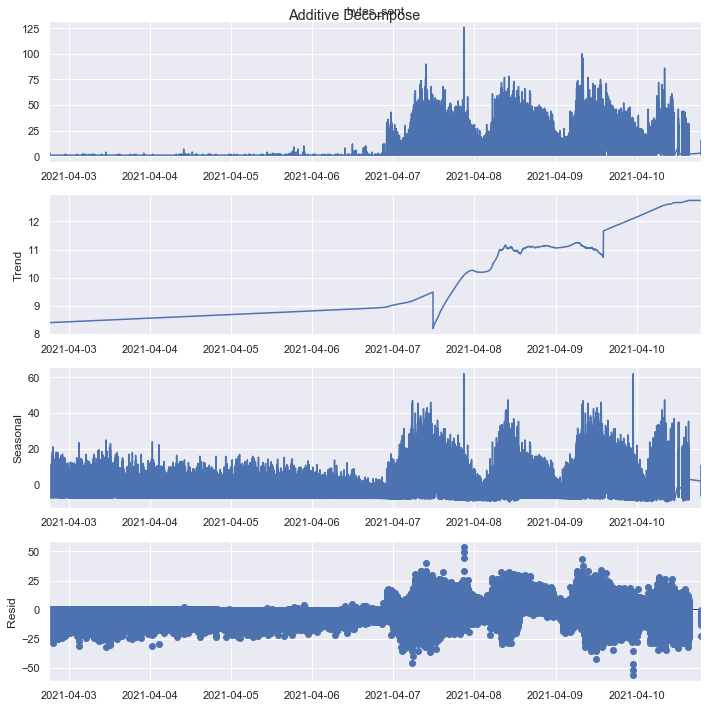

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(curr['bytes_sent'], model='additive', extrapolate_trend='freq', period = len(curr) // 2)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose')
plt.show()

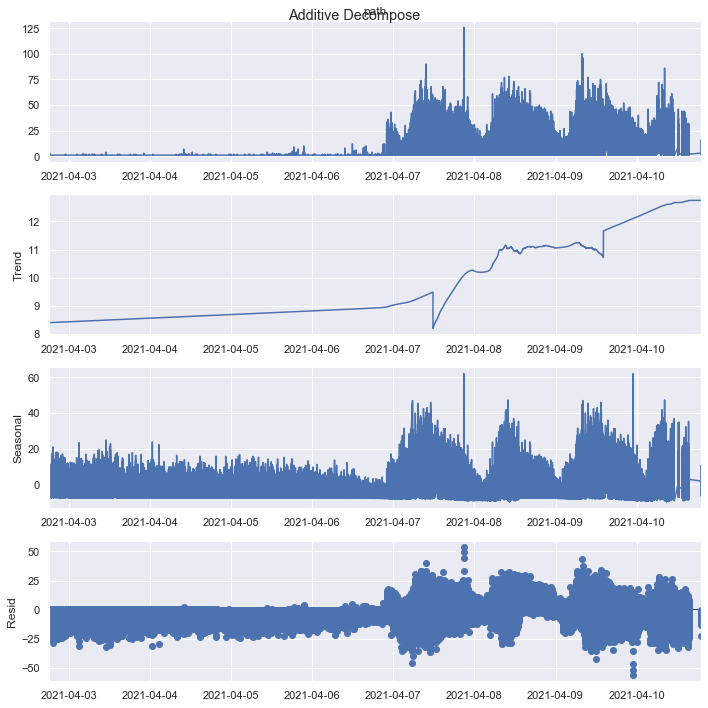

In [155]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(curr['path'], model='additive', extrapolate_trend='freq', period = len(curr) // 2)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose')
plt.show()

In [156]:
# df['remote'] = pd.to_numeric(df.remote.str.replace('.', ''), errors='coerce')

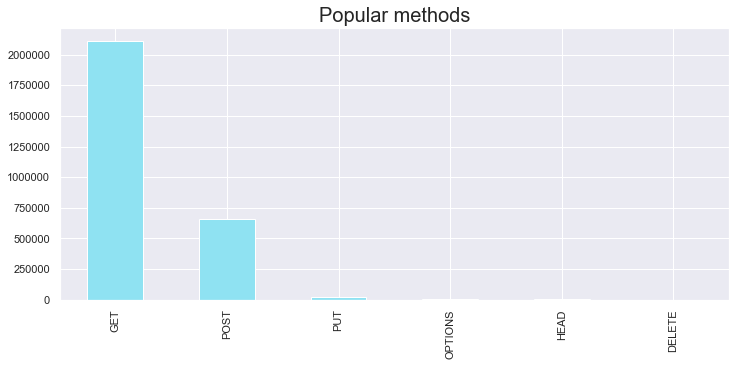

In [157]:
plt.rcParams['figure.figsize'] = (12, 5)
df['method'].value_counts().plot.bar(color=np.random.rand(3,))
plt.title('Popular methods', fontsize = 20)
plt.show()

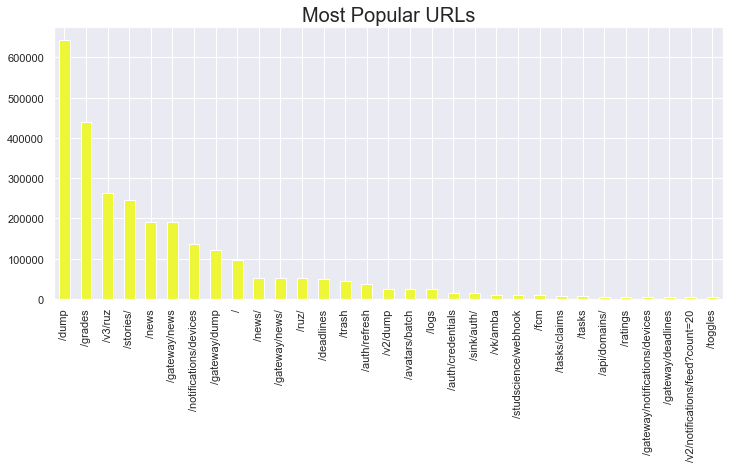

In [158]:
plt.rcParams['figure.figsize'] = (12, 5)
df['path'].value_counts().head(50).plot.bar(color=np.random.rand(3,))
plt.title('Most Popular URLs', fontsize = 20)
plt.show()

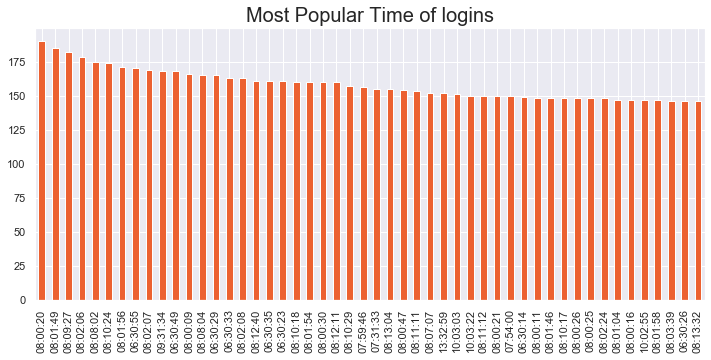

In [159]:
plt.rcParams['figure.figsize'] = (12, 5)
df['datetime'].dt.time.value_counts().head(50).plot.bar(color=np.random.rand(3,))
plt.title('Most Popular Time of logins', fontsize = 20)
plt.show()

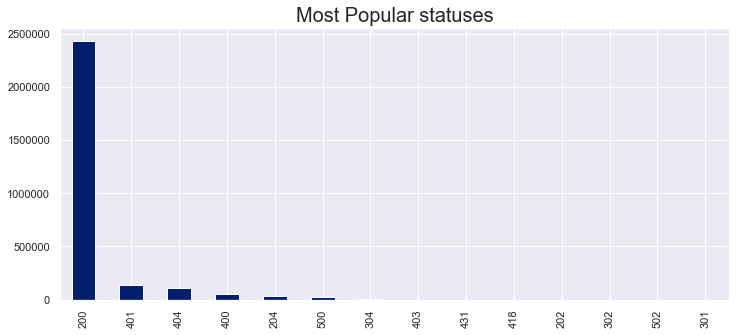

In [160]:
plt.rcParams['figure.figsize'] = (12, 5)
df['status'].value_counts().head(40).plot.bar(color=np.random.rand(3,))
plt.title('Most Popular statuses', fontsize = 20)
plt.show()

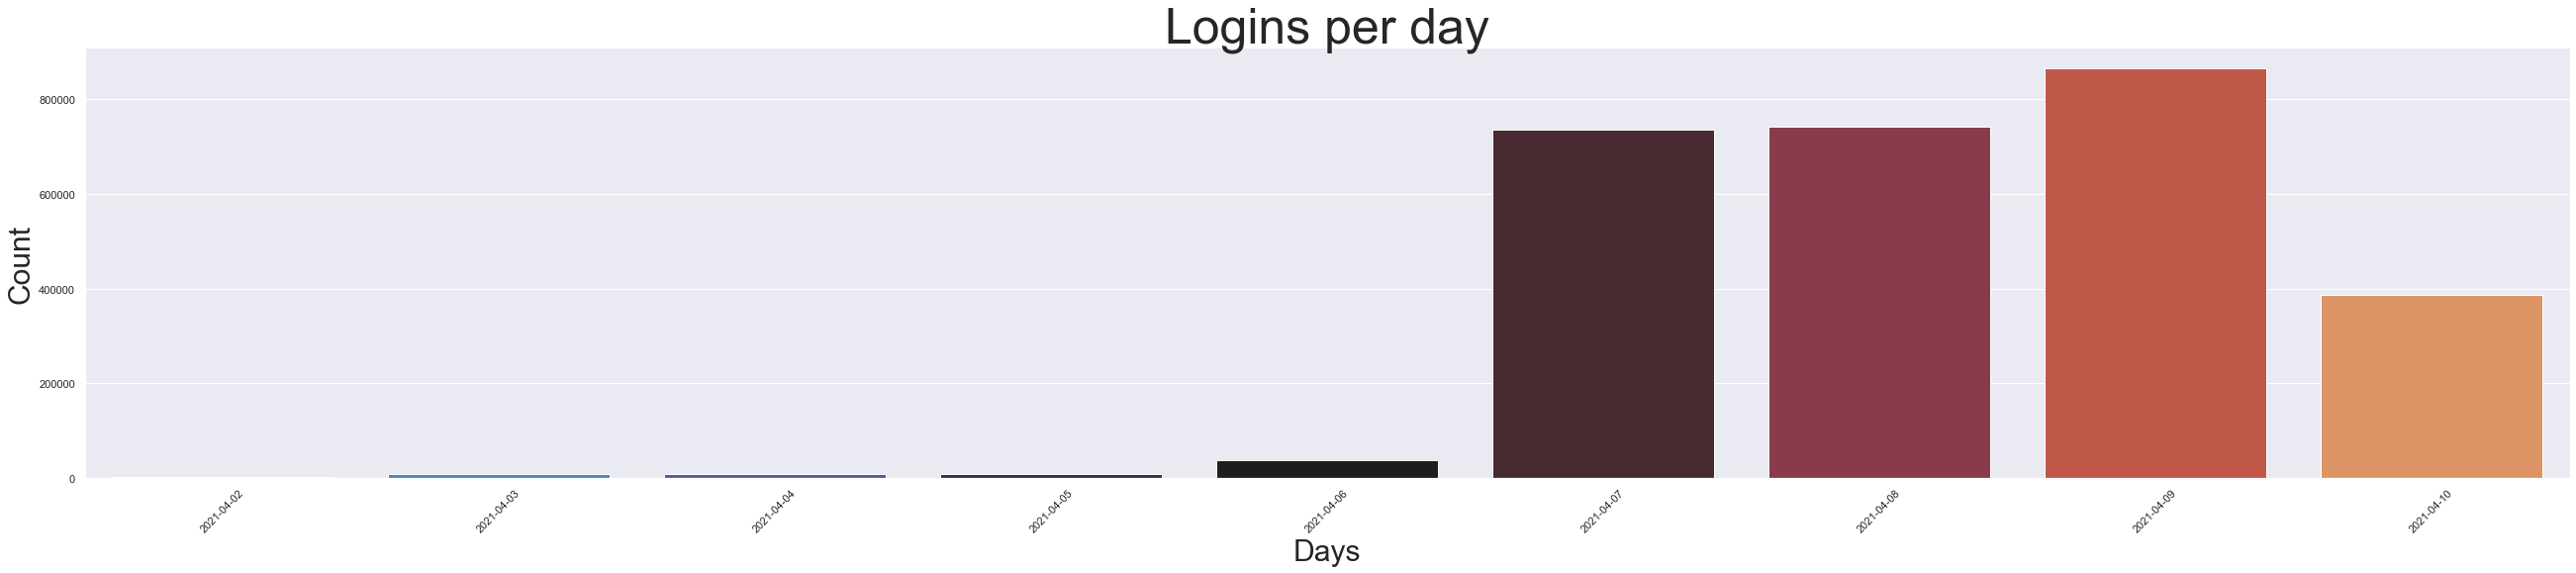

In [161]:
date = df['datetime'].dt.date.sort_values()
plt.figure(figsize=(45,8))
plt.xticks(rotation=45)
sns_plot = sns.countplot(x=date, data=df, palette="icefire")
plt.title("Logins per day", fontsize = 50)
plt.xlabel('Days',fontsize = 30)
plt.ylabel('Сount', fontsize = 30)
fig = sns_plot.get_figure()

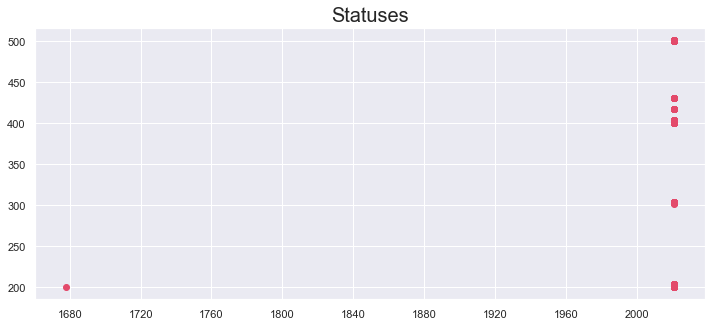

In [162]:
plt.rcParams['figure.figsize'] = (12, 5)
# curr = df.sort_values(by='datetime')
plt.scatter(df.datetime.dt.date.values, df.status, color=np.random.rand(3,))
plt.title('Statuses', fontsize = 20)
plt.show()

In [108]:
#  ----------------------------------------------------------------------
# Copyright (C) 2014-2015, Numenta, Inc.  Unless you have an agreement
# with Numenta, Inc., for a separate license for this software code, the
# following terms and conditions apply:
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero Public License version 3 as
# published by the Free Software Foundation.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
# See the GNU Affero Public License for more details.
#
# You should have received a copy of the GNU Affero Public License
# along with this program.  If not, see http://www.gnu.org/licenses.
#
# http://numenta.org/licenses/
# ----------------------------------------------------------------------

import os
from setuptools import setup, find_packages

REPO_DIR = os.path.dirname(os.path.realpath(__file__))


# Utility function to read the README file.
# Used for the long_description.  It"s nice, because now 1) we have a top level
# README file and 2) it"s easier to type in the README file than to put a raw
# string in below ...
def read(fname):
    with open(os.path.join(os.path.dirname(__file__), fname)) as f:
        result = f.read()
    return result


def parseFile(requirementFile):
    """
    Parse requirement file.
    :return: list of requirements.
    """
    try:
        return [
            line.strip()
            for line in open(requirementFile).readlines()
                if not line.startswith("#")
        ]
    except IOError:
        return []


def findRequirements():
    """
    Read the requirements.txt file and parse into requirements for setup's
    install_requirements option.
    """
    requirementsPath = os.path.join(REPO_DIR, "requirements.txt")
    return parseFile(requirementsPath)


if __name__ == "__main__":
    requirements = findRequirements()

    setup(
    name="nab",
    version="1.1",
    author="Alexander Lavin",
    author_email="nab@numenta.org",
    description=(
      "Numenta Anomaly Benchmark: A benchmark for streaming anomaly prediction"),
    license="AGPL",
    packages=find_packages(),
    long_description=read("README.md"),
    install_requires=requirements,
    entry_points={
      "console_scripts": [
        "nab-plot = nab.plot:main",
      ],
    },
    )

NameError: name '__file__' is not defined

# Детектирование по-умному

## Кластеризация

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


df.dropna(inplace=True)

In [23]:
df.sample(5)

,method,path,remote,bytes_sent,request_length,request_time,status,tag,upstream,user_agent,datetime,upstream_addr
658412,GET,/news,89.208.222.170,2.0,1333.0,0.006,200,mcs,default-banners-service-80,HSE/4.18 (com.matkavt.HSE; build:0; iOS 14.4.2...,2021-04-07 18:01:25+00:00,10.100.152.102:80
644573,GET,/gateway/news,83.220.239.203,2.0,683.0,0.018,200,mcs,default-gateway-service-80,HSE/4.18 (com.matkavt.HSE; build:0; iOS 14.4.2...,2021-04-07 17:24:40+00:00,10.100.152.81:80
532904,OPTIONS,/vk/amba,188.170.86.130,0.0,73.0,0.002,204,mcs,default-amba-service-80,Mozilla/5.0 (Linux; Android 10; BMH-AN10 Build...,2021-04-07 12:29:35+00:00,10.100.152.85:80
323553,GET,/gateway/news/,79.126.7.234,2.0,28.0,0.107,200,mcs,default-gateway-service-80,okhttp/3.12.0,2021-04-07 10:05:55+00:00,10.100.231.81:80
1077323,GET,/stories/,176.193.132.179,1393.0,23.0,0.116,200,mcs,default-stories-service-80,okhttp/3.12.0,2021-04-08 07:25:04+00:00,10.100.152.112:80


In [24]:
df.datetime.nunique()

295764

In [206]:
numeric = ['bytes_sent', 'request_length', 'request_time', 'Hour', 'Time', 'Day']
categorical = ['path', 'method', 'status', 'tag', 'upstream']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

df.dropna(inplace=True)
df_tr = pd.DataFrame(column_transformer.fit_transform(df[[*numeric, *categorical]]).toarray())

pca = PCA(n_components=2).fit(df_tr)
pca_2d = pca.transform(df_tr)

# нарисуем, как сейчас выглядят отмасштабированные данные
plt.scatter(pca_2d[:,0], pca_2d[:, 1], color=np.random.rand(3,))
plt.title('2D transformed data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

MemoryError: Unable to allocate 2.33 GiB for an array with shape (2797829, 112) and data type float64

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [16:53<00:00, 126.73s/it]


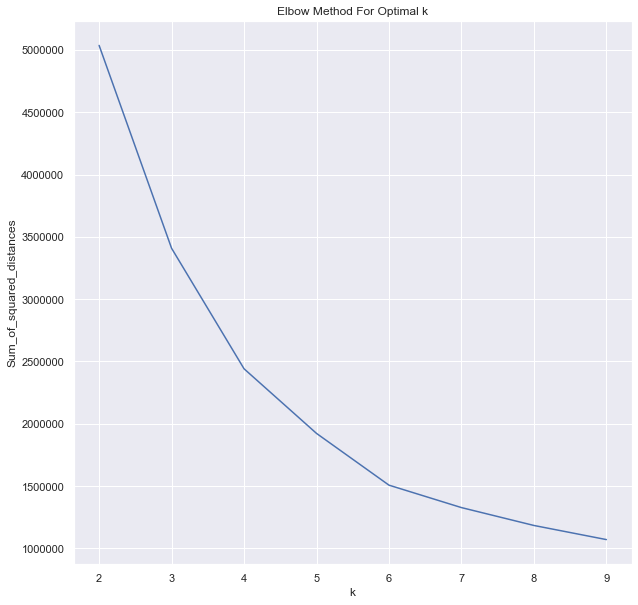

In [46]:
# определим оптимальное число кластеров методом Elbow method
Sum_of_squared_distances = []
K = range(2,10)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(pca_2d)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [47]:
# судя по выраженному сгибу, подходящее число кластеров -- 6
np.random.seed(42)

kmeans = KMeans(n_clusters=6, random_state=16).fit(pca_2d)
y = kmeans.predict(pca_2d)
df['predict_cluster'] = y

In [ ]:
# раскрасим объекты на первоначальном графике в цвета кластеров

colors = np.random.rand(6, 3)
plt.scatter(pca_2d[y ==0,0], pca_2d[y == 0,1], s=30, color=colors[0])
plt.scatter(pca_2d[y ==1,0], pca_2d[y == 1,1], s=30, color=colors[1])
plt.scatter(pca_2d[y ==2,0], pca_2d[y == 2,1], s=30, color=colors[2])
plt.scatter(pca_2d[y ==3,0], pca_2d[y == 3,1], s=30, color=colors[3])
plt.scatter(pca_2d[y ==4,0], pca_2d[y == 4,1], s=30, color=colors[4])
plt.scatter(pca_2d[y ==5,0], pca_2d[y == 5,1], s=30, color=colors[5])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, color='black')
plt.title('2D transformed splitted data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [197]:
# расстояние между каждой точкой и его ближайшим центроидом

def getDistanceByPoint(data, model):
    distance = pd.Series()
    cluster_cnt = model.labels_.max()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        #Xb = model.cluster_centers_[model.labels_[i]-1]
        #distance.set_value(i, np.linalg.norm(Xa-Xb1))
        dist = []
        for j in range(0, cluster_cnt):
            if model.labels_[i] != j:
                Xb = model.cluster_centers_[j]
                dist.append(np.linalg.norm(Xa-Xb))
        distance.set_value(i, min(dist))
    return distance


distance = getDistanceByPoint(pca_2d, kmeans)
number_of_outliers = int(0.01 * len(distance))
threshold = distance.nlargest(number_of_outliers).min()
df['anomaly1'] = (distance >= threshold).astype(int)
df['anomaly1'] = df['anomaly1'].fillna(0.0)

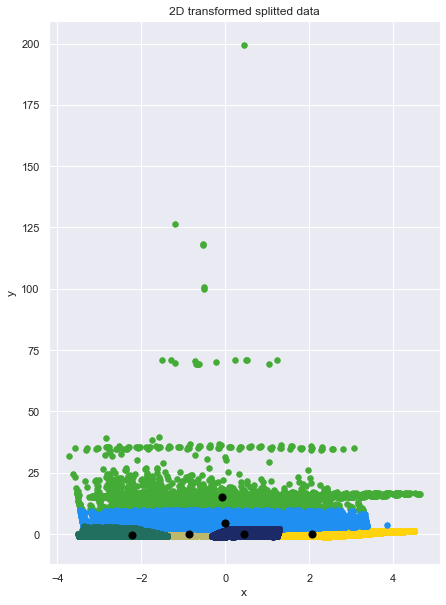

In [205]:
colors = np.random.rand(6, 3)
plt.scatter(pca_2d[y ==0,0], pca_2d[y == 0,1], s=30, color=colors[0])
plt.scatter(pca_2d[y ==1,0], pca_2d[y == 1,1], s=30, color=colors[1])
plt.scatter(pca_2d[y ==2,0], pca_2d[y == 2,1], s=30, color=colors[2])
plt.scatter(pca_2d[y ==3,0], pca_2d[y == 3,1], s=30, color=colors[3])
plt.scatter(pca_2d[y ==4,0], pca_2d[y == 4,1], s=30, color=colors[4])
plt.scatter(pca_2d[y ==5,0], pca_2d[y == 5,1], s=30, color=colors[5])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, color='black')
plt.title('2D transformed splitted data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


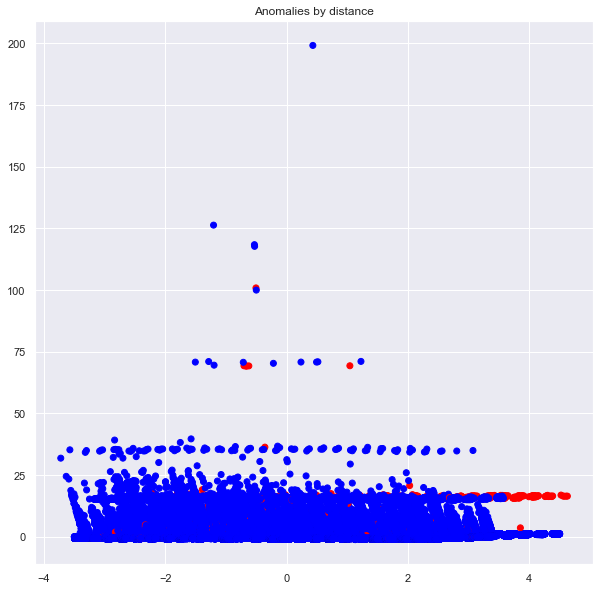

In [51]:
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(pca_2d[:, 0], pca_2d[:, 1], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.title('Anomalies by distance')
plt.show()

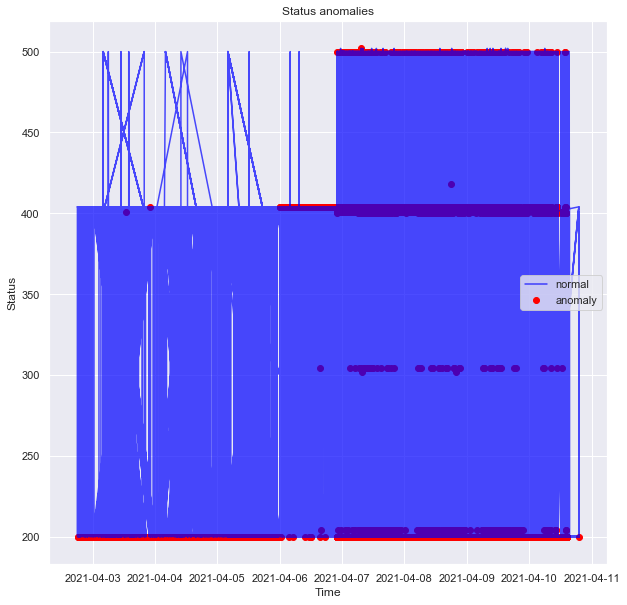

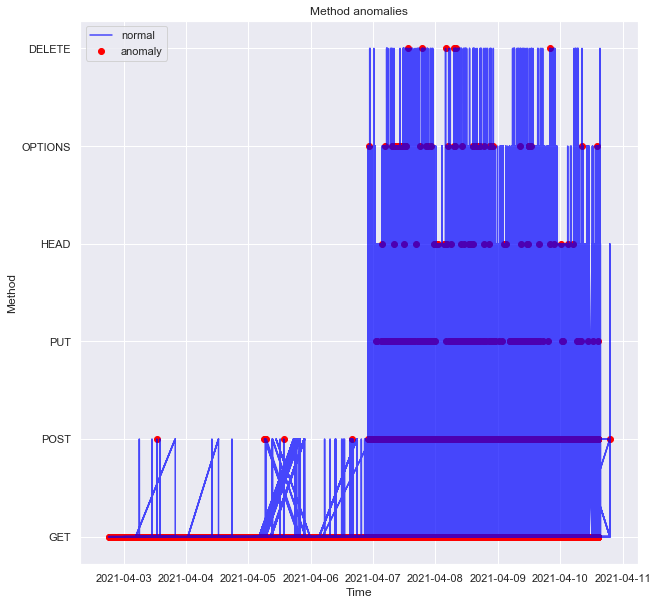

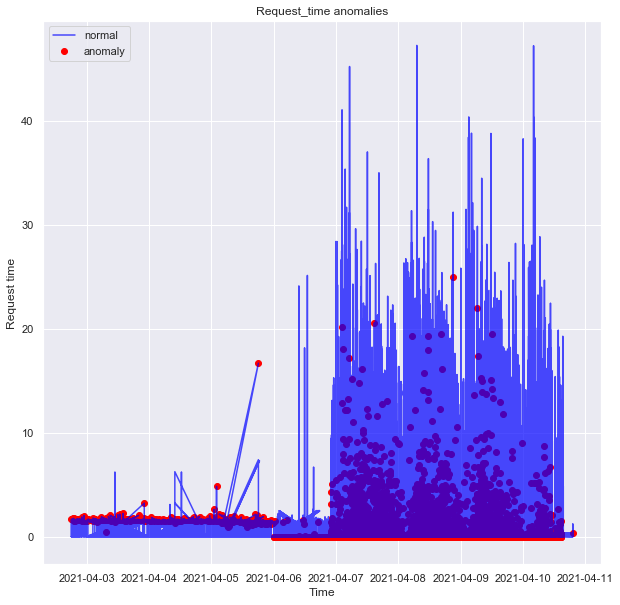

In [52]:
fig, ax = plt.subplots()
a = df.loc[df['anomaly1'] == 1, ['datetime', 'status']]
ax.plot(df['datetime'], df['status'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['status'], color='red', label='anomaly')
plt.title('Status anomalies')
plt.xlabel('Time')
plt.ylabel('Status')
plt.legend()
plt.show()

fig, ax = plt.subplots()
a = df.loc[df['anomaly1'] == 1, ['datetime', 'method']]
ax.plot(df['datetime'], df['method'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['method'], color='red', label='anomaly')
plt.title('Method anomalies')
plt.xlabel('Time')
plt.ylabel('Method')
plt.legend()
plt.show()

fig, ax = plt.subplots()
a = df.loc[df['anomaly1'] == 1, ['datetime', 'request_time']]
ax.plot(df['datetime'], df['request_time'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['request_time'], color='red', label='anomaly')
plt.title('Request_time anomalies')
plt.xlabel('Time')
plt.ylabel('Request time')
plt.legend()
plt.show()

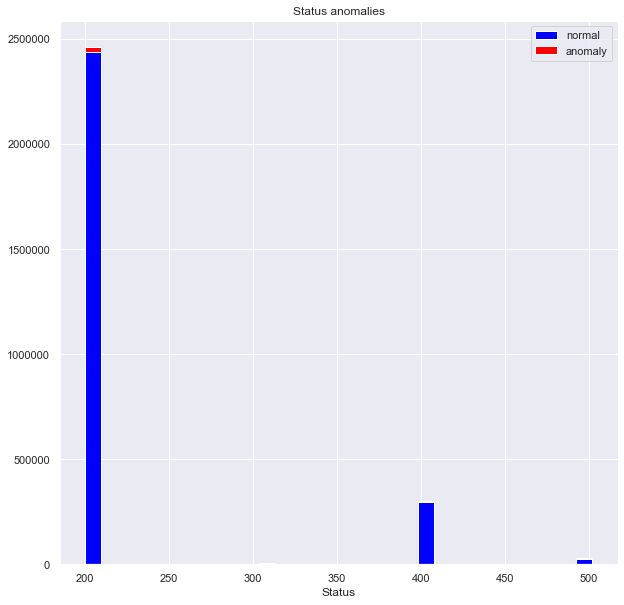

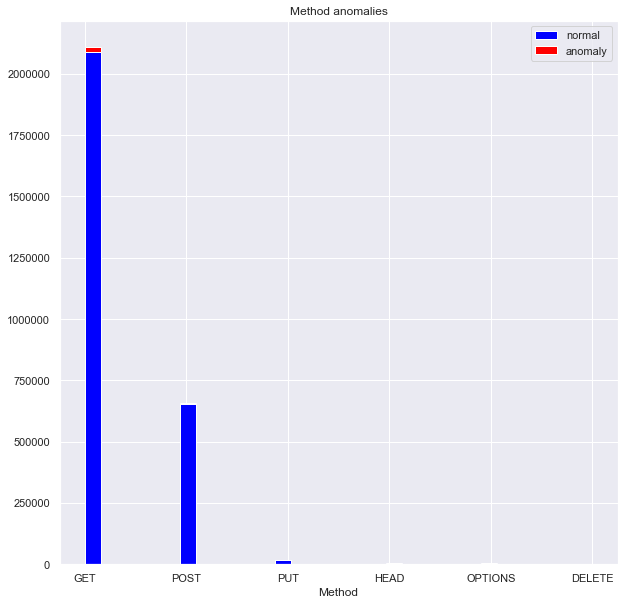

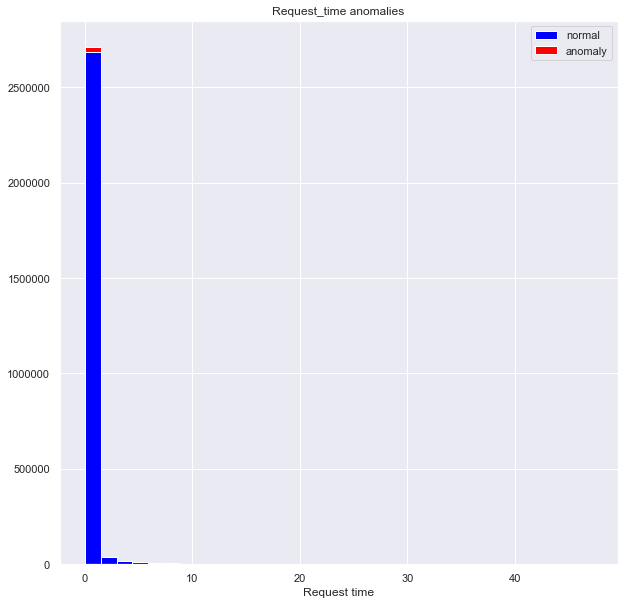

In [53]:
a = df.loc[df['anomaly1'] == 0, 'status']
b = df.loc[df['anomaly1'] == 1, 'status']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Status anomalies')
plt.xlabel('Status')
plt.legend()
plt.show()

a = df.loc[df['anomaly1'] == 0, 'method']
b = df.loc[df['anomaly1'] == 1, 'method']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Method anomalies')
plt.xlabel('Method')
plt.legend()
plt.show()

a = df.loc[df['anomaly1'] == 0, 'request_time']
b = df.loc[df['anomaly1'] == 1, 'request_time']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Request_time anomalies')
plt.xlabel('Request time')
plt.legend()
plt.show()

In [58]:
a1 = df.loc[df['anomaly1'] == 1]
a1

,method,path,remote,bytes_sent,request_length,request_time,status,tag,upstream,user_agent,datetime,upstream_addr,Day,Hour,Time,predict_cluster,anomaly1
45,GET,/trash,10.244.2.0,19238313.0,1212.0,1.617,200,sber,default-pf-asav-service-80,got (https://github.com/sindresorhus/got),2021-04-02 18:45:20+00:00,10.244.2.13:80,2,18,67520,2,1.0
52,GET,/trash,10.244.2.0,19238313.0,1212.0,1.658,200,sber,default-pf-asav-service-80,got (https://github.com/sindresorhus/got),2021-04-02 18:50:12+00:00,10.244.2.13:80,2,18,67812,2,1.0
99,GET,/trash,10.244.2.0,19238313.0,1212.0,1.632,200,sber,default-pf-asav-service-80,got (https://github.com/sindresorhus/got),2021-04-02 19:20:18+00:00,10.244.2.13:80,2,19,69618,2,1.0
201,GET,/trash,10.244.2.0,19238313.0,1212.0,1.749,200,sber,default-pf-asav-service-80,got (https://github.com/sindresorhus/got),2021-04-02 19:00:32+00:00,10.244.2.13:80,2,19,68432,2,1.0
225,GET,/trash,10.244.2.0,19238313.0,1212.0,1.623,200,sber,default-pf-asav-service-80,got (https://github.com/sindresorhus/got),2021-04-02 19:15:16+00:00,10.244.2.13:80,2,19,69316,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796502,GET,/news,89.208.222.170,2.0,1510.0,0.006,200,mcs,default-banners-service-80,HSE/4.18 (com.matkavt.HSE; build:0; iOS 14.4.2...,2021-04-10 14:27:35+00:00,10.100.152.102:80,10,14,52055,5,1.0
2796523,GET,/dump,89.208.222.170,407.0,170.0,0.152,200,mcs,default-dump-service-80,-,2021-04-10 14:27:44+00:00,10.100.231.92:80,10,14,52064,5,1.0
2796620,GET,/news/,89.208.222.170,2.0,549.0,0.006,200,mcs,default-banners-service-80,okhttp/3.12.0,2021-04-10 14:28:42+00:00,10.100.152.102:80,10,14,52122,5,1.0
2797025,POST,/grades,45.89.226.135,2.0,673.0,0.240,200,mcs,default-reports-service-80,Apache-HttpClient/4.5.9 (Java/1.8.0_282),2021-04-10 14:29:41+00:00,10.100.231.121:80,10,14,52181,5,1.0


anomaly1,0.0,1.0,%1,%0
bytes_sent,17829.500695,391778.186852,95.647176,4.352824
request_length,674.124794,1027.615171,60.386146,39.613854
request_time,0.232773,0.262905,53.039477,46.960523
status,224.913996,226.705681,50.198362,49.801638
Day,8.255172,7.965150,49.105991,50.894009
Hour,11.779972,11.587522,49.588210,50.411790
Time,44167.187849,43465.804219,49.599818,50.400182
predict_cluster,2.346945,2.209533,48.492133,51.507867


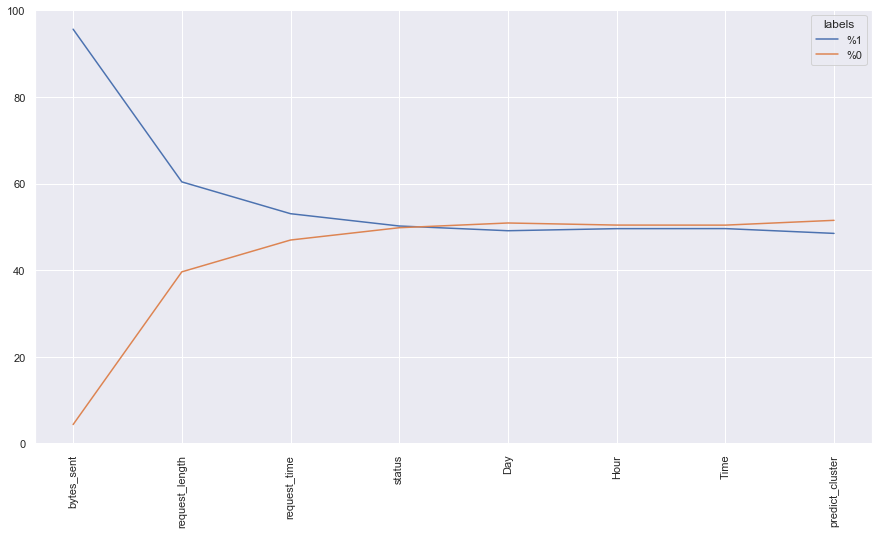

In [81]:
summary = df.groupby(by='anomaly1').mean()
summary.loc['%1'] = summary.iloc[1] / (summary.iloc[0] + summary.iloc[1]) * 100
summary.loc['%0'] = summary.iloc[0] / (summary.iloc[0] + summary.iloc[1]) * 100
display(summary.T)
plt.figure(figsize=(15, 8))
for i in ['%1', '%0']:
    plt.plot(summary.loc[i], data=summary, label=i)
    plt.xticks(rotation=90)
plt.legend(title='labels')
plt.show()

In [86]:
df['anomaly1'].value_counts()

0.0    2770053
1.0      27776
Name: anomaly1, dtype: int64

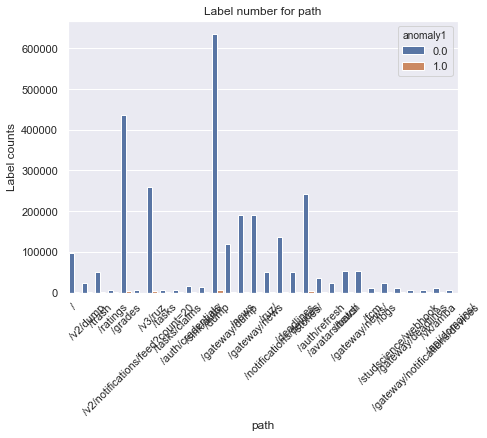

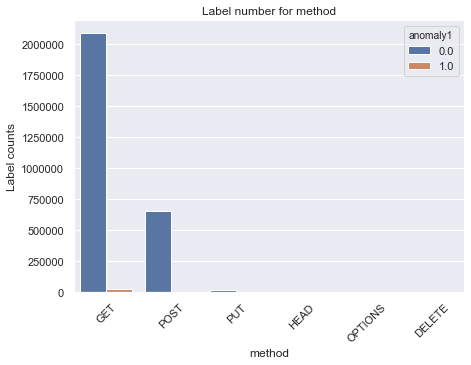

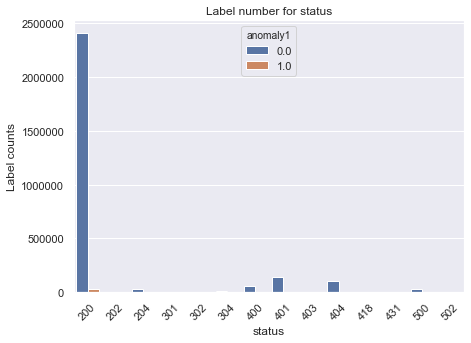

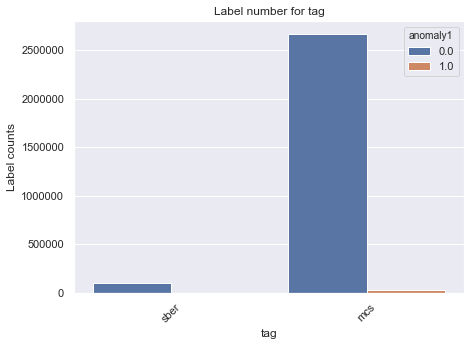

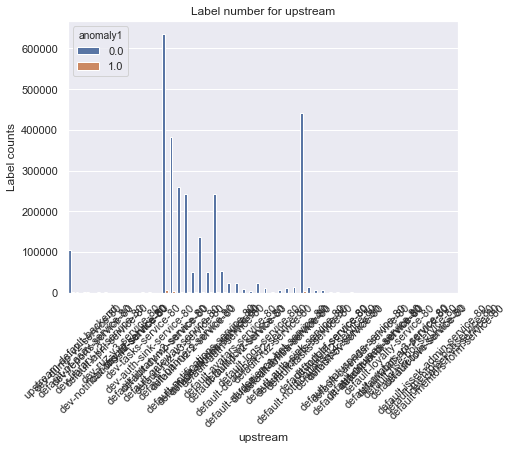

In [90]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()


for cat in categorical:
    plt.figure(figsize=(7,5))
    sns.countplot(cat, hue='anomaly1', data=df)
#     (df[cat].groupby(df['anomaly1']).value_counts(normalize=True).rename('proportion')\
#         .reset_index()
#         .pipe((sns.barplot, "data"), x=cat, y='proportion', hue='anomaly1'))
    plt.title('Label number for ' + cat)
    plt.xlabel(cat)
    plt.xticks(rotation=45)
    plt.ylabel('Label counts')
#     with_hue(ax, df[cat], df[cat].nunique(), 2)
    plt.show()

## Clusters + Gaussian
ValueError: The covariance matrix of the support data is equal to 0, try to increase support_fraction

In [130]:
# используем те разбиения, что мы получили на прерыдущей кластеризации

df_class0 = df.loc[df['predict_cluster'] == 0, 'status']
df_class1 = df.loc[df['predict_cluster'] == 1, 'status']
df_class2 = df.loc[df['predict_cluster'] == 2, 'status']
df_class3 = df.loc[df['predict_cluster'] == 3, 'status']
df_class4 = df.loc[df['predict_cluster'] == 4, 'status']
df_class5 = df.loc[df['predict_cluster'] == 5, 'status']

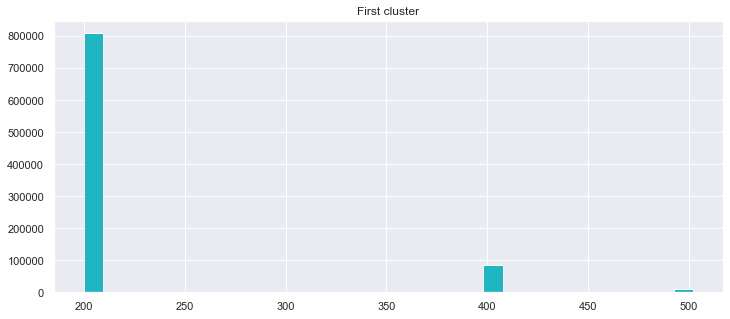

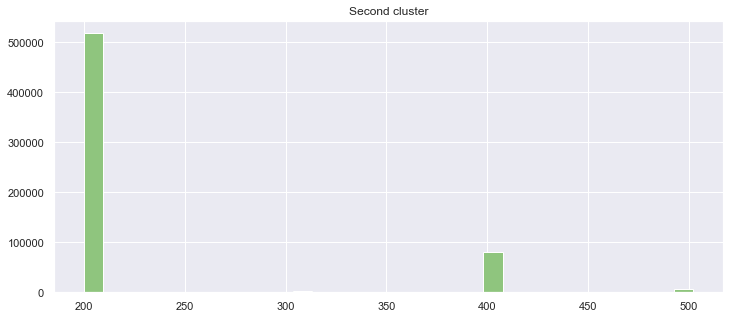

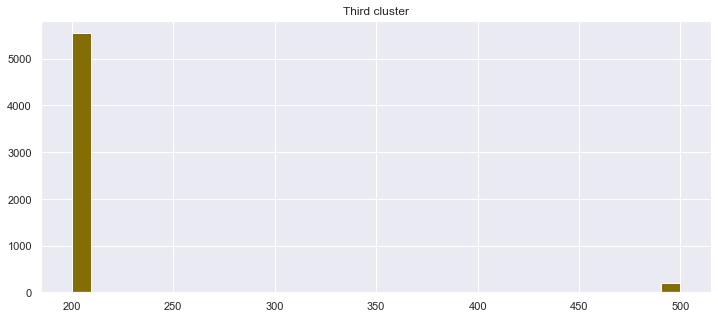

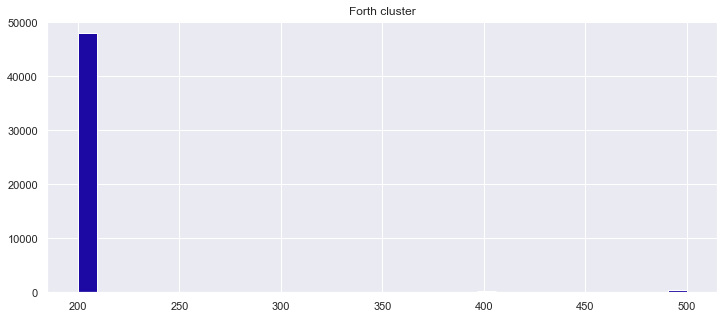

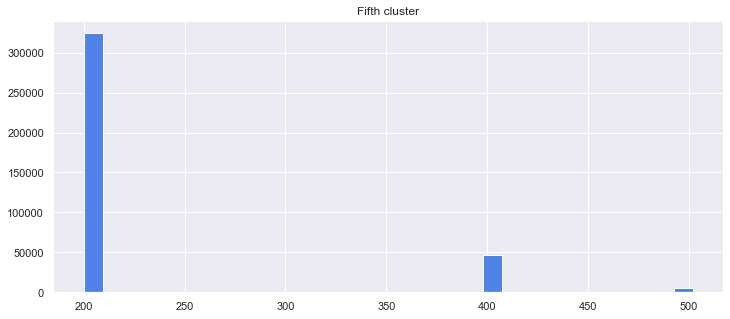

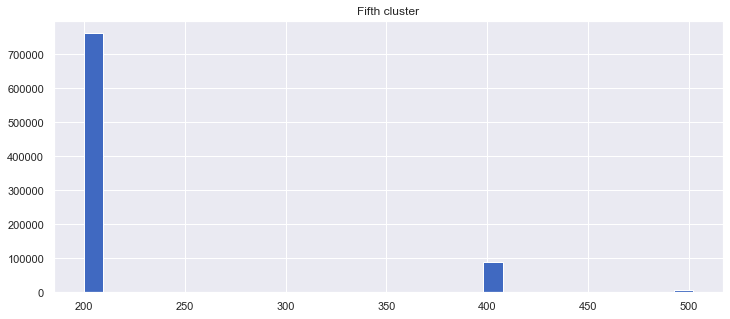

In [110]:
plt.hist(df_class0, bins=32, color=np.random.rand(3,))
plt.title('First cluster')
plt.show()
plt.hist(df_class1, bins=32, color=np.random.rand(3,))
plt.title('Second cluster')
plt.show()
plt.hist(df_class2, bins=32, color=np.random.rand(3,))
plt.title('Third cluster')
plt.show()
plt.hist(df_class3, bins=32, color=np.random.rand(3,))
plt.title('Forth cluster')
plt.show()
plt.hist(df_class4, bins=32, color=np.random.rand(3,))
plt.title('Fifth cluster')
plt.show()
plt.hist(df_class5, bins=32, color=np.random.rand(3,))
plt.title('Fifth cluster')
plt.show()

In [131]:
from sklearn.covariance import EllipticEnvelope


# пришло время поработать с Гауссовским распределением
envelope =  EllipticEnvelope(support_fraction=0.9) 
X_train = df_class0.values.reshape(-1, 1)
envelope.fit(X_train)
df_class0 = pd.DataFrame(df_class0)
df_class0['deviation'] = envelope.decision_function(X_train)
df_class0['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(support_fraction=0.9) 
X_train = df_class1.values.reshape(-1, 1)
envelope.fit(X_train)
df_class1 = pd.DataFrame(df_class1)
df_class1['deviation'] = envelope.decision_function(X_train)
df_class1['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(support_fraction=0.98) 
X_train = df_class2.values.reshape(-1, 1)
envelope.fit(X_train)
df_class2 = pd.DataFrame(df_class2)
df_class2['deviation'] = envelope.decision_function(X_train)
df_class2['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(support_fraction=0.99) 
X_train = df_class3.values.reshape(-1, 1)
envelope.fit(X_train)
df_class3 = pd.DataFrame(df_class3)
df_class3['deviation'] = envelope.decision_function(X_train)
df_class3['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(support_fraction=0.9) 
X_train = df_class4.values.reshape(-1, 1)
envelope.fit(X_train)
df_class4 = pd.DataFrame(df_class4)
df_class4['deviation'] = envelope.decision_function(X_train)
df_class4['anomaly'] = envelope.predict(X_train)

envelope =  EllipticEnvelope(support_fraction=0.9) 
X_train = df_class5.values.reshape(-1, 1)
envelope.fit(X_train)
df_class5 = pd.DataFrame(df_class5)
df_class5['deviation'] = envelope.decision_function(X_train)
df_class5['anomaly'] = envelope.predict(X_train)

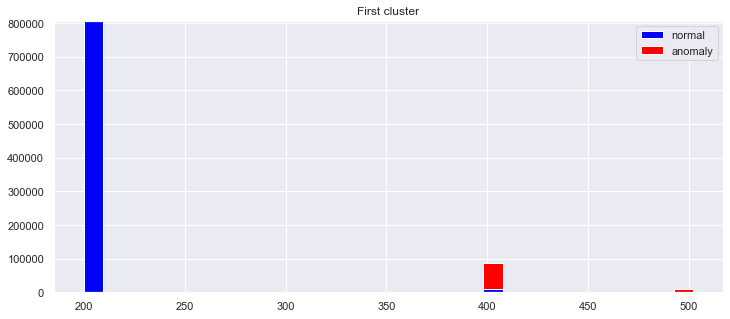

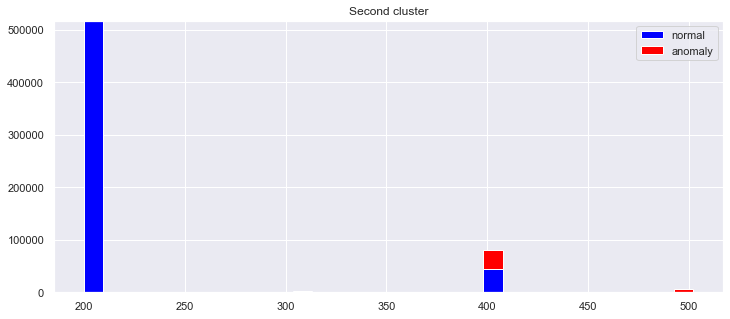

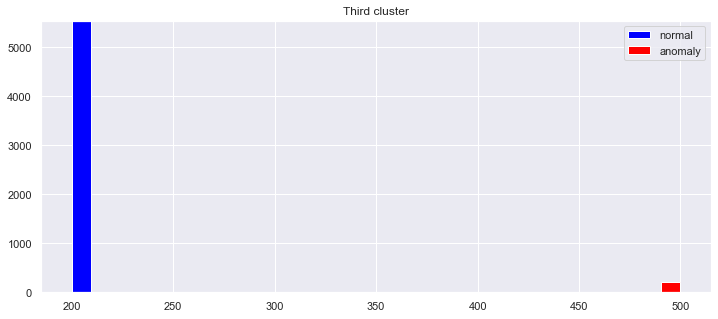

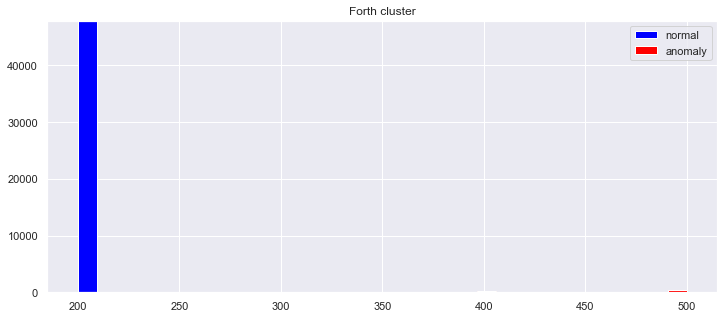

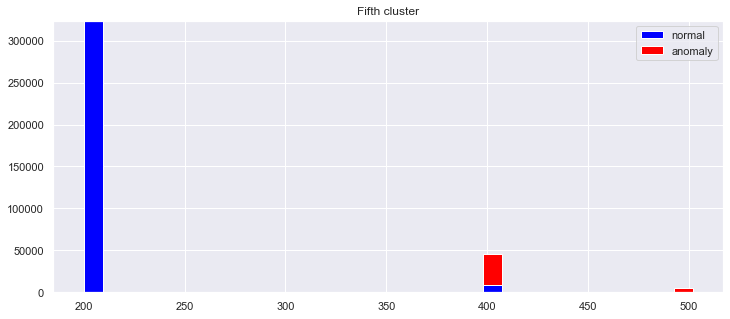

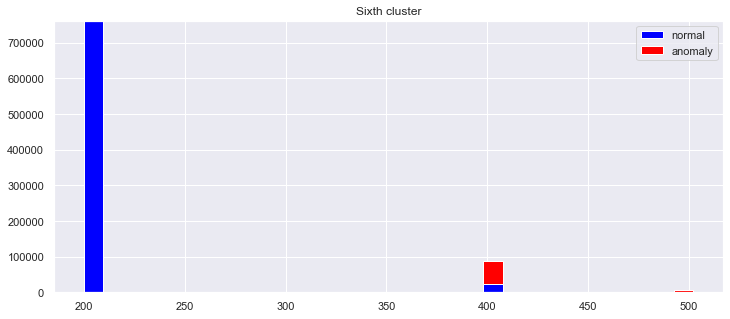

In [133]:
a0 = df_class0.loc[df_class0['anomaly'] == 1, 'status']
b0 = df_class0.loc[df_class0['anomaly'] == -1, 'status']

a1 = df_class1.loc[df_class1['anomaly'] == 1, 'status']
b1 = df_class1.loc[df_class1['anomaly'] == -1, 'status']

a2 = df_class2.loc[df_class2['anomaly'] == 1, 'status']
b2 = df_class2.loc[df_class2['anomaly'] == -1, 'status']

a3 = df_class3.loc[df_class3['anomaly'] == 1, 'status']
b3 = df_class3.loc[df_class3['anomaly'] == -1, 'status']

a4 = df_class4.loc[df_class4['anomaly'] == 1, 'status']
b4 = df_class4.loc[df_class4['anomaly'] == -1, 'status']

a5 = df_class5.loc[df_class5['anomaly'] == 1, 'status']
b5 = df_class5.loc[df_class5['anomaly'] == -1, 'status']

plt.hist([a0,b0], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('First cluster')
plt.legend()
plt.show()
plt.hist([a1,b1], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Second cluster')
plt.legend()
plt.show()
plt.hist([a2,b2], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Third cluster')
plt.legend()
plt.show()
plt.hist([a3,b3], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Forth cluster')
plt.legend()
plt.show()
plt.hist([a4,b4], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Fifth cluster')
plt.legend()
plt.show()
plt.hist([a5,b5], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Sixth cluster')
plt.legend()
plt.show()

In [134]:
df_class = pd.concat([df_class0, df_class1, df_class2, df_class3, df_class4, df_class5])
df['anomaly3'] = df_class['anomaly']
df['anomaly3'] = np.array(df['anomaly3'] == -1).astype(int)

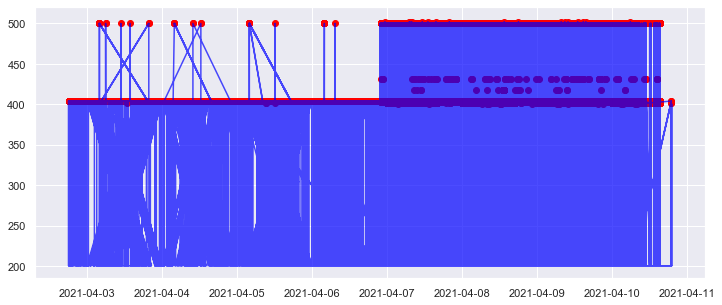

In [136]:
fig, ax = plt.subplots()
a = df.loc[df['anomaly3'] == 1, ['datetime', 'status']]
ax.plot(df['datetime'], df['status'], color='blue', alpha=0.7)
ax.scatter(a['datetime'],a['status'], color='red')
plt.show()

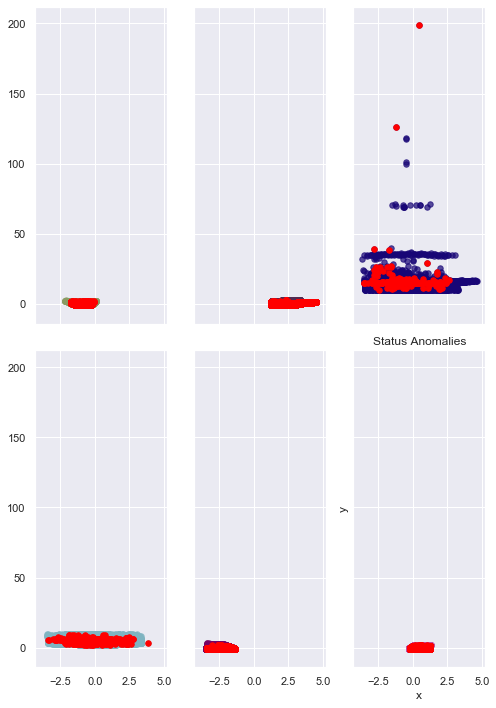

In [196]:
# раскрасим объекты на первоначальном графике в цвета кластеров

fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

colors = np.random.rand(6, 3)
cnt = 0
for i in range(2):
    for j in range(3):
        axs[i, j].scatter(pca_2d[y==cnt, 0], pca_2d[y==cnt,1], s=30, color=colors[cnt], alpha=0.7)
        axs[i, j].scatter(pca_2d[(y == cnt) & (df['anomaly3'] == 1), 0], pca_2d[(y == cnt) & (df['anomaly3'] == 1) == 1, 1], 
                         c="red", s=30)
        cnt += 1
        plt.xlabel('x')
        plt.ylabel('y')

plt.title('Status Anomalies')
plt.tight_layout()
plt.show() 

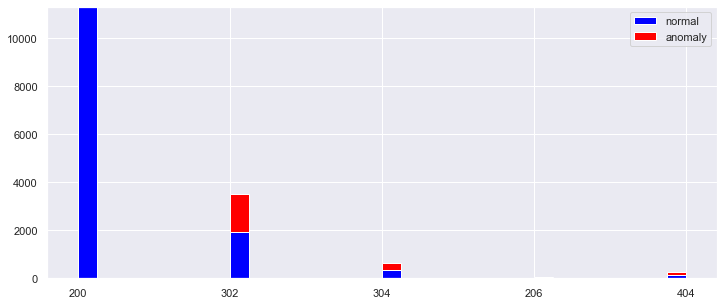

In [35]:
a = df.loc[df['anomaly3'] == 0, 'status']
b = df.loc[df['anomaly3'] == 1, 'status']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.legend()
plt.show()

## One class SVM

In [ ]:
from sklearn.svm import OneClassSVM


model =  OneClassSVM()
data = pd.DataFrame(df_tr)
model.fit(data)
df['anomaly2'] = pd.Series(model.predict(data))
df['anomaly2'] = df['anomaly2'].map( {1: 0, -1: 1} )
print(df['anomaly2'].value_counts())

In [ ]:
fig, ax = plt.subplots()
a = df.loc[df['anomaly2'] == 1, ['datetime', 'status']]
ax.plot(df['datetime'], df['status'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['status'], color='red', label='anomaly')
plt.title('Status anomalies')
plt.xlabel('Time')
plt.ylabel('Status')
plt.legend()
plt.show()

fig, ax = plt.subplots()
a = df.loc[df['anomaly2'] == 1, ['datetime', 'method']]
ax.plot(df['datetime'], df['method'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['method'], color='red', label='anomaly')
plt.title('Method anomalies')
plt.xlabel('Time')
plt.ylabel('Method')
plt.legend()
plt.show()

fig, ax = plt.subplots()
a = df.loc[df['anomaly2'] == 1, ['datetime', 'request_time']]
ax.plot(df['datetime'], df['request_time'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['request_time'], color='red', label='anomaly')
plt.title('Request_time anomalies')
plt.xlabel('Time')
plt.ylabel('Request time')
plt.legend()
plt.show()

In [ ]:
a = df.loc[df['anomaly2'] == 0, 'status']
b = df.loc[df['anomaly2'] == 1, 'status']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Status anomalies')
plt.xlabel('Status')
plt.legend()
plt.show()

a = df.loc[df['anomaly2'] == 0, 'method']
b = df.loc[df['anomaly2'] == 1, 'method']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Method anomalies')
plt.xlabel('Method')
plt.legend()
plt.show()

a = df.loc[df['anomaly2'] == 0, 'request_time']
b = df.loc[df['anomaly2'] == 1, 'request_time']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Request_time anomalies')
plt.xlabel('Request time')
plt.legend()
plt.show()


##  Isolation tree

In [7]:
numeric = ['bytes_sent', 'request_length', 'request_time']
categorical = ['path', 'method', 'status', 'tag']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

df.dropna(inplace=True)
df_tr = pd.DataFrame(column_transformer.fit_transform(df[[*numeric, *categorical]]).toarray())

In [9]:
df_tr

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.034254,-0.084488,-0.258276
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.034254,-0.084488,-0.259393
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.034254,-0.084488,-0.260511
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.034254,-0.084488,-0.260511
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.034254,-0.084488,-0.259393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.034485,0.017949,0.024509
2797825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.034032,0.027132,-0.209096
2797826,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.033915,-0.080372,-0.187859
2797827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.031113,-0.103646,-0.128619


In [8]:
from sklearn.ensemble import IsolationForest


model =  IsolationForest(contamination = 0.01)
model.fit(df_tr)

df['anomaly3'] = pd.Series(model.predict(df_tr))
df['anomaly3'] = df['anomaly3'].map( {1: 0, -1: 1} )
df['anomaly3'].value_counts()

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
a = df.loc[df['anomaly3'] == 1, ['datetime', 'status']]
ax.plot(df['datetime'], df['status'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['status'], color='red', label='anomaly')
plt.title('Status anomalies')
plt.xlabel('Time')
plt.ylabel('Status')
plt.legend()
plt.show()

fig, ax = plt.subplots()
a = df.loc[df['anomaly3'] == 1, ['datetime', 'method']]
ax.plot(df['datetime'], df['method'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['method'], color='red', label='anomaly')
plt.title('Method anomalies')
plt.xlabel('Time')
plt.ylabel('Method')
plt.legend()
plt.show()

fig, ax = plt.subplots()
a = df.loc[df['anomaly3'] == 1, ['datetime', 'request_time']]
ax.plot(df['datetime'], df['request_time'], color='blue', alpha=0.7, label='normal')
ax.scatter(a['datetime'],a['request_time'], color='red', label='anomaly')
plt.title('Request_time anomalies')
plt.xlabel('Time')
plt.ylabel('Request time')
plt.legend()
plt.show()

In [ ]:
a = df.loc[df['anomaly3'] == 0, 'status']
b = df.loc[df['anomaly3'] == 1, 'status']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Status anomalies')
plt.xlabel('Status')
plt.legend()
plt.show()

a = df.loc[df['anomaly3'] == 0, 'method']
b = df.loc[df['anomaly3'] == 1, 'method']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Method anomalies')
plt.xlabel('Method')
plt.legend()
plt.show()

a = df.loc[df['anomaly3'] == 0, 'request_time']
b = df.loc[df['anomaly3'] == 1, 'request_time']

fig, axs = plt.subplots()
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'], label=['normal', 'anomaly'])
plt.title('Request_time anomalies')
plt.xlabel('Request time')
plt.legend()
plt.show()
